In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import file from parent directory
import sys
sys.path.append('../')
import utils

random.seed(0)

val_size = .2
test_size = .3

# Data loading

In [2]:
data_dir = "../../data/tnm_stage"

In [3]:
df_data = pd.read_csv(
    os.path.join(data_dir, "tcga_reports_tnm_stage.csv"),
    sep=',',
    header=0
)

In [4]:
df_data.shape

(3898, 5)

In [5]:
df_data.head()

,patient_id,text,t_label,n_label,m_label
0,TCGA-05-4244,Diagnosis: 1. Resection material from the righ...,T2,N2,M1
1,TCGA-05-4245,Diagnosis: 1. Atypical resection material from...,T2,N2,M0
2,TCGA-05-4249,Diagnosis: 2. and 3. Two-part resection materi...,T2,N0,M0
3,TCGA-05-4250,2. and 3. Resection material from the right lo...,T3,N1,M0
4,TCGA-05-4382,Main diagnosis/diagnoses: Primarily evidently ...,T2,N0,M0


In [6]:
df_data.index = df_data["patient_id"].values

In [7]:
df_data["tnm_label"] = df_data.apply(
    lambda row: row["t_label"] + row["n_label"] + row["m_label"],
    axis=1
)

In [8]:
len(set(df_data["tnm_label"]))

30

In [9]:
utils.value_dist({
    "TNM": df_data["tnm_label"]
})

,TNM
T2N0M0,778 (20.0%)
T1N0M0,692 (17.8%)
T3N0M0,545 (14.0%)
T2N1M0,371 (9.5%)
T3N1M0,332 (8.5%)
T4N0M0,169 (4.3%)
T3N2M0,143 (3.7%)
T2N2M0,143 (3.7%)
T1N1M0,133 (3.4%)
T4N2M0,91 (2.3%)


# Data split

In [10]:
arr_pat_id = df_data["patient_id"].values.tolist()

In [11]:
n_test_size = round(test_size * df_data.shape[0])

In [12]:
n_val_size = round(val_size * df_data.shape[0])

## Test split

In [13]:
arr_test_pat_id = random.sample(arr_pat_id, n_test_size)

In [14]:
df_test = df_data.loc[arr_test_pat_id].copy()

In [15]:
df_test.shape

(1169, 6)

In [16]:
arr_train_val_pat_id = [
    pat_id for pat_id in arr_pat_id
    if pat_id not in arr_test_pat_id
]

In [17]:
df_train_val = df_data.loc[arr_train_val_pat_id].copy()

## Val split

In [18]:
arr_val_pat_id = random.sample(arr_train_val_pat_id, n_val_size)

In [19]:
df_val = df_data.loc[arr_val_pat_id].copy()

In [20]:
df_val.shape

(780, 6)

In [21]:
arr_train_pat_id = [
    pat_id for pat_id in arr_train_val_pat_id
    if pat_id not in arr_val_pat_id
]

In [22]:
df_train = df_data.loc[arr_train_pat_id].copy()

In [23]:
df_train.shape

(1949, 6)

In [24]:
# Sanity check
assert df_train.shape[0] + df_val.shape[0] + df_test.shape[0] == df_data.shape[0]
assert len(set(df_train["patient_id"].values).intersection(set(df_val["patient_id"].values))) == 0
assert len(set(df_train["patient_id"].values).intersection(set(df_test["patient_id"].values))) == 0
assert len(set(df_val["patient_id"].values).intersection(set(df_test["patient_id"].values))) == 0

We ensure that the distribution of the labels in the three subsets is similar to the label distribution of the entire set:

In [25]:
utils.value_dist({
    "all": df_data["tnm_label"],
    "train": df_train["tnm_label"],
    "val": df_val["tnm_label"],
    "test": df_test["tnm_label"]
})

,all,train,val,test
T2N0M0,778 (20.0%),379 (19.4%),157 (20.1%),242 (20.7%)
T1N0M0,692 (17.8%),341 (17.5%),133 (17.1%),218 (18.6%)
T3N0M0,545 (14.0%),285 (14.6%),106 (13.6%),154 (13.2%)
T2N1M0,371 (9.5%),189 (9.7%),79 (10.1%),103 (8.8%)
T3N1M0,332 (8.5%),156 (8.0%),71 (9.1%),105 (9.0%)
T4N0M0,169 (4.3%),84 (4.3%),42 (5.4%),43 (3.7%)
T3N2M0,143 (3.7%),76 (3.9%),25 (3.2%),42 (3.6%)
T2N2M0,143 (3.7%),70 (3.6%),31 (4.0%),42 (3.6%)
T1N1M0,133 (3.4%),68 (3.5%),24 (3.1%),41 (3.5%)
T4N2M0,91 (2.3%),46 (2.4%),14 (1.8%),31 (2.7%)


We present the same information in a graphical way:

In [26]:
df_label_dist = pd.DataFrame({
    "all": df_data["tnm_label"].value_counts(normalize=True).to_dict(),
    "train": df_train["tnm_label"].value_counts(normalize=True).to_dict(),
    "val": df_val["tnm_label"].value_counts(normalize=True).to_dict(),
    "test": df_test["tnm_label"].value_counts(normalize=True).to_dict()
})

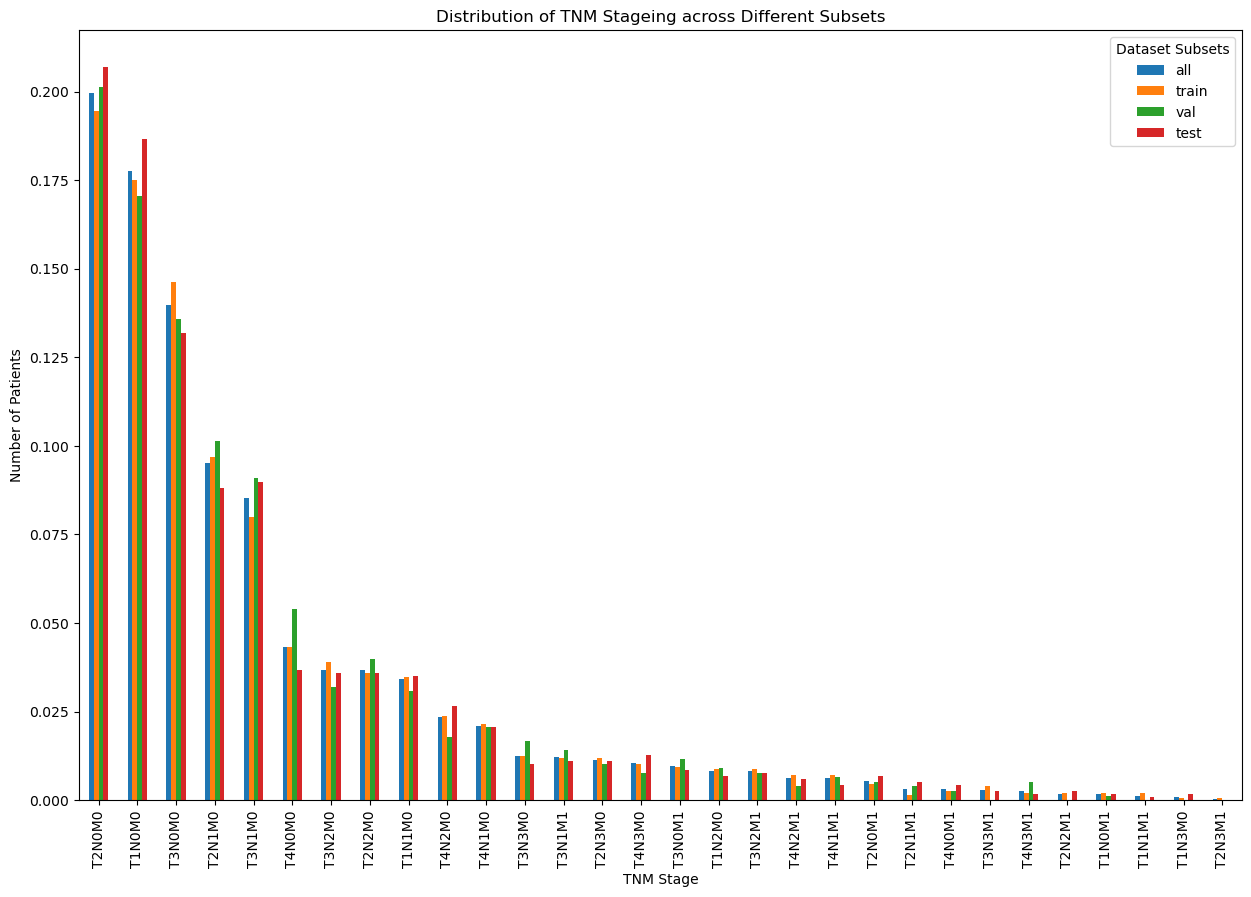

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
df_label_dist.plot(kind='bar', ax=ax)
ax.set_title('Distribution of TNM Stageing across Different Subsets')
ax.set_xlabel('TNM Stage')
ax.set_ylabel('Number of Patients')
ax.legend(title="Dataset Subsets")
plt.show()

# Stratified split

In [28]:
random_seed = 0

We remove classes with only 1 sample:

In [29]:
df_data.shape

(3898, 6)

In [30]:
df_data = df_data[df_data["tnm_label"] != "T2N3M1"]

In [31]:
df_data.shape

(3897, 6)

## Test split

In [32]:
df_train_val, df_test = train_test_split(
    df_data,
    test_size=test_size,
    random_state=random_seed,
    stratify=df_data["tnm_label"]
)

In [33]:
df_test.shape

(1170, 6)

## Val split

In [34]:
# Adjust val_size proportionally to the remaining data
val_size_adjusted = val_size / (1 - test_size)  # Because test set is already removed

In [35]:
df_train, df_val = train_test_split(
    df_train_val,
    test_size=val_size_adjusted,
    random_state=random_seed,
    stratify=df_train_val["tnm_label"]
)

In [36]:
df_val.shape

(780, 6)

In [37]:
df_train.shape

(1947, 6)

In [38]:
df_train.shape[0] / df_data.shape[0], df_val.shape[0] / df_data.shape[0], df_test.shape[0] / df_data.shape[0]

(0.4996150885296382, 0.20015396458814472, 0.3002309468822171)

In [39]:
# Sanity check
assert df_train.shape[0] + df_val.shape[0] + df_test.shape[0] == df_data.shape[0]
assert len(set(df_train["patient_id"].values).intersection(set(df_val["patient_id"].values))) == 0
assert len(set(df_train["patient_id"].values).intersection(set(df_test["patient_id"].values))) == 0
assert len(set(df_val["patient_id"].values).intersection(set(df_test["patient_id"].values))) == 0

We ensure that the distribution of the labels in the three subsets is similar to the label distribution of the entire set:

In [40]:
utils.value_dist({
    "all": df_data["tnm_label"],
    "train": df_train["tnm_label"],
    "val": df_val["tnm_label"],
    "test": df_test["tnm_label"]
})

,all,train,val,test
T2N0M0,778 (20.0%),389 (20.0%),156 (20.0%),233 (19.9%)
T1N0M0,692 (17.8%),345 (17.7%),139 (17.8%),208 (17.8%)
T3N0M0,545 (14.0%),272 (14.0%),109 (14.0%),164 (14.0%)
T2N1M0,371 (9.5%),186 (9.6%),74 (9.5%),111 (9.5%)
T3N1M0,332 (8.5%),166 (8.5%),66 (8.5%),100 (8.5%)
T4N0M0,169 (4.3%),84 (4.3%),34 (4.4%),51 (4.4%)
T3N2M0,143 (3.7%),71 (3.6%),29 (3.7%),43 (3.7%)
T2N2M0,143 (3.7%),71 (3.6%),29 (3.7%),43 (3.7%)
T1N1M0,133 (3.4%),66 (3.4%),27 (3.5%),40 (3.4%)
T4N2M0,91 (2.3%),46 (2.4%),18 (2.3%),27 (2.3%)


We present the same information in a graphical way:

In [41]:
df_label_dist = pd.DataFrame({
    "all": df_data["tnm_label"].value_counts(normalize=True).to_dict(),
    "train": df_train["tnm_label"].value_counts(normalize=True).to_dict(),
    "val": df_val["tnm_label"].value_counts(normalize=True).to_dict(),
    "test": df_test["tnm_label"].value_counts(normalize=True).to_dict()
})

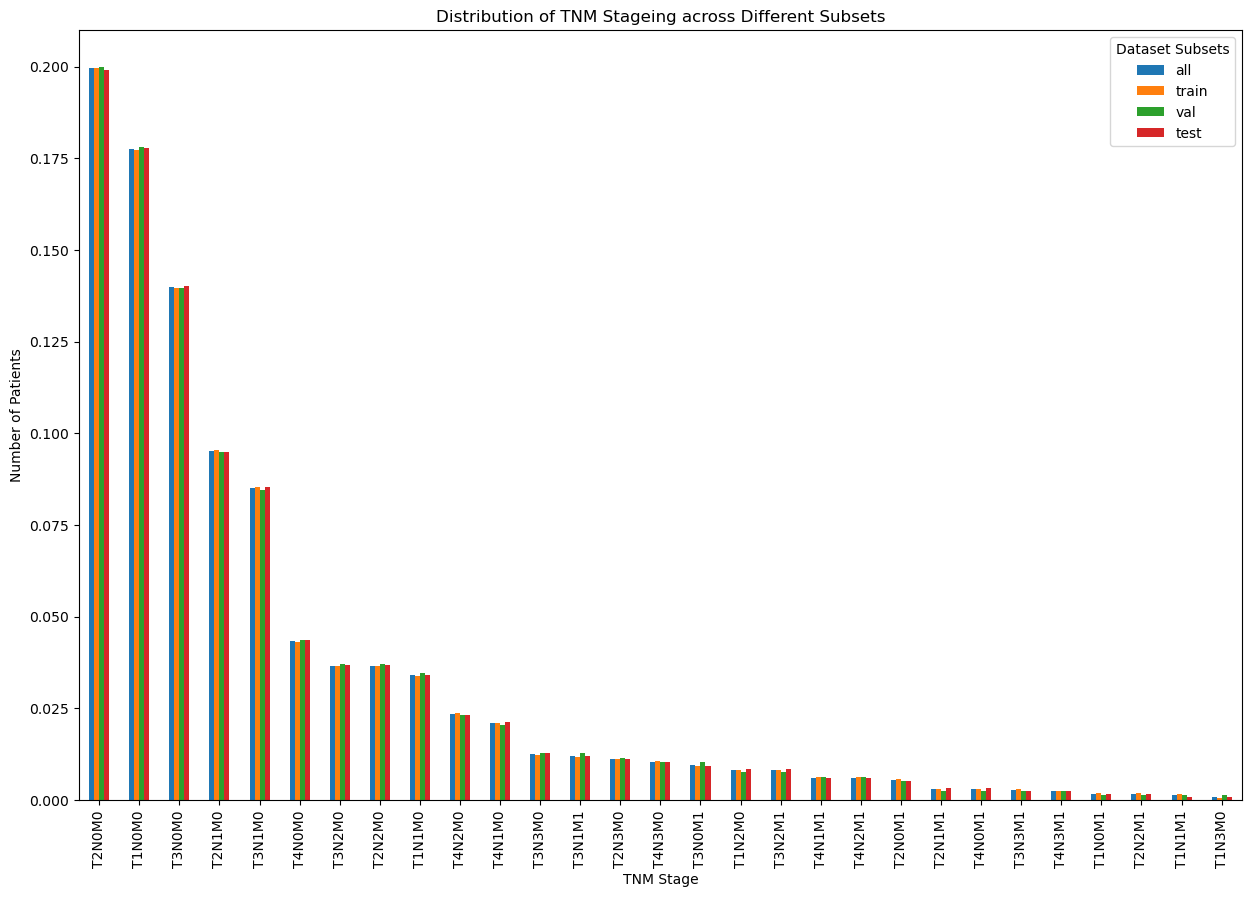

In [42]:
fig, ax = plt.subplots(figsize=(15, 10))
df_label_dist.plot(kind='bar', ax=ax)
ax.set_title('Distribution of TNM Stageing across Different Subsets')
ax.set_xlabel('TNM Stage')
ax.set_ylabel('Number of Patients')
ax.legend(title="Dataset Subsets")
plt.show()

We also ensure that the distributions of individual T, N, and M labels are stratified:

In [43]:
utils.value_dist({
    "all": df_data["t_label"],
    "train": df_train["t_label"],
    "val": df_val["t_label"],
    "test": df_test["t_label"]
})

,all,train,val,test
T2,1376 (35.3%),689 (35.4%),275 (35.3%),412 (35.2%)
T3,1196 (30.7%),596 (30.6%),240 (30.8%),360 (30.8%)
T1,872 (22.4%),435 (22.3%),175 (22.4%),262 (22.4%)
T4,453 (11.6%),227 (11.7%),90 (11.5%),136 (11.6%)


In [44]:
utils.value_dist({
    "all": df_data["n_label"],
    "train": df_train["n_label"],
    "val": df_val["n_label"],
    "test": df_test["n_label"]
})

,all,train,val,test
N0,2261 (58.0%),1129 (58.0%),453 (58.1%),679 (58.0%)
N1,1006 (25.8%),503 (25.8%),201 (25.8%),302 (25.8%)
N2,472 (12.1%),236 (12.1%),94 (12.1%),142 (12.1%)
N3,158 (4.1%),79 (4.1%),32 (4.1%),47 (4.0%)


In [45]:
utils.value_dist({
    "all": df_data["m_label"],
    "train": df_train["m_label"],
    "val": df_val["m_label"],
    "test": df_test["m_label"]
})

,all,train,val,test
M0,3648 (93.6%),1821 (93.5%),731 (93.7%),1096 (93.7%)
M1,249 (6.4%),126 (6.5%),49 (6.3%),74 (6.3%)


# Save

We finally save the training, validation and test subsets:

In [46]:
df_train.to_csv(
    os.path.join(data_dir, "train_tcga_reports_tnm_stage.csv"),
    sep=',',
    index=False,
    header=True
)

In [47]:
df_val.to_csv(
    os.path.join(data_dir, "val_tcga_reports_tnm_stage.csv"),
    sep=',',
    index=False,
    header=True
)

In [48]:
df_test.to_csv(
    os.path.join(data_dir, "test_tcga_reports_tnm_stage.csv"),
    sep=',',
    index=False,
    header=True
)